**Mixalis Nikitaras**  
# Computational Dynamics, Astrodynamics and Applications
## Exercise 2
### Task 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import math as m

In [2]:
#Cartesian Elements to Keplerian
def car2kep(car,GM):
    x,y,vx,vy=car
    
    r_vec=[x,y]
    r=np.linalg.norm(r_vec)
    v_vec=[vx,vy]
    v=np.linalg.norm(v_vec)
    Energy=0.5*v**2 - GM/r
    a=-GM/(2*Energy)
    rv=np.dot(r_vec,v_vec)
    e1=(v**2/GM - 1/r)*x - rv/GM*vx
    e2=(v**2/GM - 1/r)*y - rv/GM*vy
    
    e_vec=[e1,e2]
    e=np.linalg.norm(e_vec)
    
    return [a,e]

In [3]:
#Define System of Differential Equations
def rhs_2bp(t,X):
    x,y,vx,vy=X
    mu=398600.433
    
    r=np.sqrt(x**2+y**2)
    r3=r*r*r
    x_dot=vx
    y_dot=vy
    
    vx_dot=-mu*x/r3
    vy_dot=-mu*y/r3
    
    return [x_dot,y_dot,vx_dot,vy_dot]

In [4]:
rearth=6371 #Earth Radius in km
mu=398600.433 #Earth's mu in km^3/s^2
H=400 #Satellite's initial height in km
x0=0 #Satellite's initial x position in km
y0=rearth+H #Satellite's initial y position in km
r0=np.sqrt(x0**2 + y0**2) #Initial orbit radius
vc=np.sqrt(mu/r0) #Initial speed of satellite
vx0=-vc
vy0=0
T=2*np.pi/vc*(rearth+H) #Orbital period of satellite
ICCAR=[x0,y0,vx0,vy0] #Initial conditions in cartesian coordinates


In [12]:
sol=solve_ivp(rhs_2bp,[1e-4,6000*T],ICCAR,method='DOP853',atol=1e-18,rtol=1e-16)
new_radius=np.sqrt(sol.y[0][-1]**2 + sol.y[1][-1]**2)
error_radius=(-new_radius+(rearth+H))/(rearth+H)

C:\Users\Areti\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


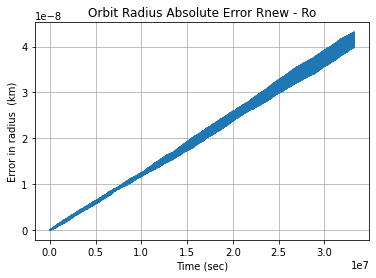

In [14]:
# Figure 0 Settings
plt.figure(0)
plt.xlabel("Time (sec)")
plt.ylabel("Error in radius  (km)")
plt.grid()
plt.title('Orbit Radius Absolute Error Rnew - Ro')
plt.plot(sol.t,abs(np.sqrt(sol.y[0]**2 + sol.y[1]**2)-(rearth+H)))

### Conclusions
In this script our goal is to numerically integrate the differential equations of a satellite in cartesian coordinates.  
There are no pertubations in the system we are simulating.  


The only force affecting the satellite is considered to be Earth's gravitational pull.  

Thus, we expect the orbital elements to remain unchanged during the orbit propagation, since no pertubative forces affect the movement of the satellite.  

However, as we observe from the figure above, as well as from the error in the computation of the satellite's orbital radius the initial orbital radius changes in the n-th decimal, where n is the accuracy of the computational system running the script.  

The integration time span is 6000 orbital periods.  

From this script we confirm the orbital stability of the satellite. 

In [15]:
print("Error in height is ", error_radius*100,"%")

Error in height is  6.273512043465457e-10 %
